In this Practical you will implement different architectures of neural networks for solving the sentiment analysis task. Last week you applied Multilayer Perceptron with average embedding vectors passed as input to perform the same task. This time you will used the Embedding layer available in Keras. Instead of a single (averaged) embedding vector, the model will take a sequence of embeddings as input. You will explore the following network architectures:
1. Multilayer Perceptron with the Embedding layer, which allows to learn an embedding for each word in the training set along with the neural network learning process.
2. Multilayer Perceptron with the Embedding layer and custom pre-trained word embeddings.
3. Convolutional Neural Network with the pre-trained word embeddings.

# Task 1: MLP with Embedding Layer

**T.1** Load the yelp reviews dataset. Split it into input/output and train/test sets.

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('yelp_reviews.csv',encoding = "ISO-8859-1", header=None)

#select input and output variables
data = df.values[:,0]
labels = df.values[:,1]

In [116]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,test_size=0.2, random_state=0)

In [142]:
import matplotlib.pyplot as plt

In [117]:
print(data)

['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.'
 'Now I am getting angry and I want my damn pho.'
 "Honeslty it didn't taste THAT fresh.)"
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'
 'The fries were great too.' 'A great touch.' 'Service was very prompt.'
 'Would not go back.'
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!'
 'I was disgusted because I was pretty sure that was human hair.'
 'I was shocked because no signs indicate cash only.'
 'Highly recommended.' 'Waitress was a little slow in service.'
 'This place is not worth your time, let alone Vegas.'
 'did not like at all.' 'The Burrittos Blah!' 

***
**T1.2** Data pre-processing.

The Embedding layer offered by Keras can be used for neural networks on text data. Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. It requires the input data to be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the [Tokenizer API](http://faroit.com/keras-docs/1.2.2/preprocessing/text/) also provided with Keras. You can specify the vocabulary size via the $num\_words$ parameter. The tokenizer will pick the $num\_words$ of the most common words from your train dataset.

Convert each instance from the train set into sequence of integers using the Tokanizer.

In [118]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x_train)
train_sequence=tokenizer.texts_to_sequences(x_train)
print(train_sequence)

[[124, 13, 148, 17, 4, 165], [362, 50, 750, 26, 134, 751, 35, 1, 125, 186, 9, 2, 27, 69, 23, 75], [3, 110, 752, 363, 77, 4, 43, 258, 2, 166, 38, 753, 363, 19, 487, 754], [298, 9, 70], [755, 364, 78, 299], [22, 79, 300, 6, 756, 4, 5, 757], [21, 488, 187, 18, 24, 758, 26, 1, 759], [1, 135, 489, 36, 16], [149, 167, 10, 188], [3, 80, 29, 301, 187, 32, 760, 2, 150, 12, 223], [8, 4, 5, 490, 761, 89, 1, 365, 1, 103, 189, 33, 150, 259, 2, 260, 762, 136, 44, 136, 763], [40, 7, 12, 5, 190, 16, 137, 28, 53, 764, 84, 765, 28, 366, 56], [1, 57, 766, 7, 1, 17], [1, 261, 767, 186, 4, 302, 3, 90, 138, 768, 104, 191, 262, 24, 14, 28, 769, 2, 9, 4, 138, 263, 491], [1, 770, 367, 771, 4, 5, 492], [91, 772, 49], [773, 92, 57, 368, 493], [66, 264, 93, 8, 126, 7, 774, 33, 3, 94, 27, 111, 60, 27, 303, 13, 2, 8, 15, 27, 36, 224, 168, 5, 192], [1, 11, 7, 16], [79, 41, 40, 2, 775, 43, 23, 1, 304], [8, 15, 7, 12, 169, 50, 41, 494, 776, 71], [32, 20, 5, 777, 778, 19, 5, 779, 28, 4, 780, 2, 3, 369, 1, 781, 495, 782

You can test it by printing the first few elements from your train set and from the list storing the sequences of integer values. The number of words from the train set for each entry should be the same a the number of integers in the corresponding sequence.

In [119]:
print(x_train[0:5])
print(train_sequence[0:5])

['Went for lunch - service was slow.'
 "Point your finger at any item on the menu, order it and you won't be disappointed."
 'I ordered Albondigas soup - which was just warm - and tasted like tomato soup with frozen meatballs.'
 'Check it out.' 'Weird vibe from owners.']
[[124, 13, 148, 17, 4, 165], [362, 50, 750, 26, 134, 751, 35, 1, 125, 186, 9, 2, 27, 69, 23, 75], [3, 110, 752, 363, 77, 4, 43, 258, 2, 166, 38, 753, 363, 19, 487, 754], [298, 9, 70], [755, 364, 78, 299]]


The sequences have different lengths. Keras needs inputs to be vectorized and all inputs to have the same length. We have to pad all input sequences to have the same length. We can do this with a built in Keras function, in this case the $pad\_sequences()$ function.
Find the max length of a review and use the [pad_sequences function](https://keras.io/preprocessing/sequence/) to convert all sequences from the encoddings list into the same length.

In [120]:
from keras.preprocessing.sequence import pad_sequences
item = max(train_sequence, key=len)
print(len(item))
train_sequence=pad_sequences(train_sequence,maxlen=40)
print(train_sequence)

32
[[   0    0    0 ...   17    4  165]
 [   0    0    0 ...   69   23   75]
 [   0    0    0 ...   19  487  754]
 ...
 [   0    0    0 ...  218 1823  361]
 [   0    0    0 ...    5   16   41]
 [   0    0    0 ... 1825    7  409]]


In [121]:
print(len(train_sequence))

797


***
**T1.3** Converting the test data into sequences of the same length.

Convert the test dataset into the same format. Use the Tokenizer specified ealier.

In [122]:
test_sequence=tokenizer.texts_to_sequences(x_test)
print(x_test[0:5])
print(test_sequence[0:5])
test_sequence=pad_sequences(test_sequence,maxlen=40)
print(test_sequence)

['Stopped by this place while in Madison for the Ironman, very friendly, kind staff.'
 'The Han Nan Chicken was also very tasty.'
 'I found this place by accident and I could not be happier.'
 'Pretty good beer selection too.' 'I just wanted to leave.']
[[1249, 86, 8, 15, 316, 14, 13, 1, 21, 64, 403, 85], [1, 113, 4, 63, 21, 196], [3, 241, 8, 15, 86, 2, 3, 90, 12, 23], [118, 16, 188, 167, 142], [3, 43, 649, 6, 937]]
[[  0   0   0 ...  64 403  85]
 [  0   0   0 ...  63  21 196]
 [  0   0   0 ...  90  12  23]
 ...
 [  0   0   0 ... 228 120  34]
 [  0   0   0 ... 100  78 306]
 [  0   0   0 ...  21 308  41]]


***
**T1.4 Train and evaluate MLP with Embedding layer**

Now you can train the MLP with the [Embedding layer](https://keras.io/layers/embeddings/) and evaluate it with the test data. The Embedding layer should be added as the fist layer in a Sequential model followed by the Flatten layer. After this you can include some Dense layers suitable for your classification problem.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 797 samples, validate on 200 samples
Epoch 1/10
 - 19s - loss: 0.6986 - accuracy: 0.5433 - val_loss: 0.6628 - val_accuracy: 0.5850
Epoch 2/10
 - 18s - loss: 0.5162 - accuracy: 0.8921 - val_loss: 0.5297 - val_accuracy: 0.7450
Epoch 3/10
 - 18s - loss: 0.1899 - accuracy: 0.9724 - val_loss: 0.5003 - val_accuracy: 0.7600
Epoch 4/10
 - 18s - loss: 0.0572 - accuracy: 0.9950 - val_loss: 0.4549 - val_accuracy: 0.7750
Epoch 5/10
 - 19s - loss: 0.0227 - accuracy: 0.9987 - val_loss: 0.4809 - val_accuracy: 0.7750
Epoch 6/10
 - 21s - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.4646 - val_accuracy: 0.8000
Epoch 7/10
 - 22s - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.4969 - val_accuracy: 0.7750
Epoch 8/10
 - 21s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.4926 - val_accuracy: 0.8000
Epoch 9/10
 - 20s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.5168 - val_accuracy: 0.7850
Epoch 10/10
 - 19s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.5220 - val_accuracy: 0.8000


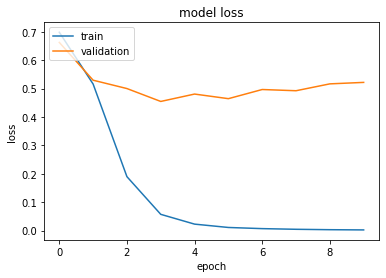

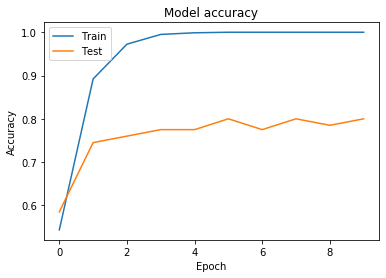

In [149]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Flatten
from keras import optimizers
from numpy.random import seed
import tensorflow

seed(0)
tensorflow.random.set_seed(0)
e=Embedding(50000,300,input_length=40,trainable=True)

model=Sequential()
model.add(e)
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(train_sequence,y_train, validation_data=(test_sequence, y_test),epochs=10, batch_size=10,verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Task 3: Embedding Layer with pre-trained embeddings

The Keras embedding layer can also use a word embedding learned elsewhere such as word2vec or GloVe. The key difference is that the embedding layer can be seeded with the pre-trained word embedding weights. For this purpose you need to build a matrix of words using the word2vec/GloVe vectors. You can set number of words that you want to use. The words will be selected as the most frequent words in the training set.

The matrix should have the number of row equals to the number of words, and number of column equals to the dimension of the embedding vectors. In each row $i$ the matrix should contain the embedding for a word which is encoded with the $i$ number.

**T2.1** Load the word2vec and the GloVe models.

In [127]:
from gensim.models import KeyedVectors
file = 'GoogleNews-vectors-negative300.bin' #pathway to the file
word2vec = KeyedVectors.load_word2vec_format(file, binary=True, limit=50000)
word2vec_vectors = word2vec.wv

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [128]:
filename = 'glove.6B.100d.txt.word2vec'
glove = KeyedVectors.load_word2vec_format(filename, binary=False, limit=50000)
glove_vectors=glove.wv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


***
**T2.2** Constructing the weight matrix for the embedding layer

The matrix can be constructed as follow.

In [132]:
import numpy as np

num_words = len(tokenizer.word_index)+1 #tokenizer is the object of Tokenizer that you used ealier      #1826 different words in dataset
embedding_matrix = np.zeros((num_words, 300))    #previous embedding was set to 300, so here is 300
for word, i in tokenizer.word_index.items():     #iterate items in word list
    if word in word2vec_vectors:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector

In [133]:
embedding_matrix.shape

(1826, 300)

You can test whether the matrix has been constructed correctly via comparing its rows with the actual embeddings.

In [134]:
tokenizer.word_index.items()

dict_items([('the', 1), ('and', 2), ('i', 3), ('was', 4), ('a', 5), ('to', 6), ('is', 7), ('this', 8), ('it', 9), ('of', 10), ('food', 11), ('not', 12), ('for', 13), ('in', 14), ('place', 15), ('good', 16), ('service', 17), ('we', 18), ('with', 19), ('had', 20), ('very', 21), ('my', 22), ('be', 23), ('were', 24), ('have', 25), ('at', 26), ('you', 27), ('that', 28), ('back', 29), ('great', 30), ('so', 31), ('they', 32), ('but', 33), ('here', 34), ('on', 35), ('are', 36), ('go', 37), ('like', 38), ('our', 39), ('there', 40), ('time', 41), ('will', 42), ('just', 43), ('as', 44), ('really', 45), ('an', 46), ('all', 47), ('best', 48), ('ever', 49), ('your', 50), ('one', 51), ('if', 52), ('would', 53), ('up', 54), ('never', 55), ('again', 56), ('only', 57), ('nice', 58), ("don't", 59), ('what', 60), ('no', 61), ('restaurant', 62), ('also', 63), ('friendly', 64), ('been', 65), ('some', 66), ('delicious', 67), ('their', 68), ("won't", 69), ('out', 70), ('vegas', 71), ('us', 72), ('experience',

In [135]:
print(np.array_equal(embedding_matrix[1] ,word2vec['the']))

True


***
**T2.3** Implementing MLP

Now you can implement the MLP with [embedding layer](https://keras.io/layers/embeddings/). You will have to pass the embedding_matrix as the $weights$ attribute. Finally, we do not want to update the learned word weights in this model, therefore we will set the $trainable$ attribute for the model to be False.

In [19]:
Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=False)

Update the model and evaluate it with the test data for comparison.

Train on 797 samples, validate on 200 samples
Epoch 1/10
 - 0s - loss: 0.6522 - accuracy: 0.6248 - val_loss: 0.5879 - val_accuracy: 0.7050
Epoch 2/10
 - 0s - loss: 0.4417 - accuracy: 0.8419 - val_loss: 0.5121 - val_accuracy: 0.7750
Epoch 3/10
 - 0s - loss: 0.2854 - accuracy: 0.9172 - val_loss: 0.4882 - val_accuracy: 0.7650
Epoch 4/10
 - 0s - loss: 0.1898 - accuracy: 0.9536 - val_loss: 0.4777 - val_accuracy: 0.7900
Epoch 5/10
 - 0s - loss: 0.1373 - accuracy: 0.9762 - val_loss: 0.4809 - val_accuracy: 0.7800
Epoch 6/10
 - 0s - loss: 0.1028 - accuracy: 0.9875 - val_loss: 0.4919 - val_accuracy: 0.7750
Epoch 7/10
 - 0s - loss: 0.0787 - accuracy: 0.9849 - val_loss: 0.5034 - val_accuracy: 0.7800
Epoch 8/10
 - 0s - loss: 0.0609 - accuracy: 0.9912 - val_loss: 0.5215 - val_accuracy: 0.7750
Epoch 9/10
 - 0s - loss: 0.0491 - accuracy: 0.9962 - val_loss: 0.5305 - val_accuracy: 0.7800
Epoch 10/10
 - 0s - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.5594 - val_accuracy: 0.7800


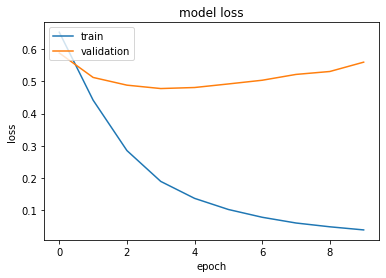

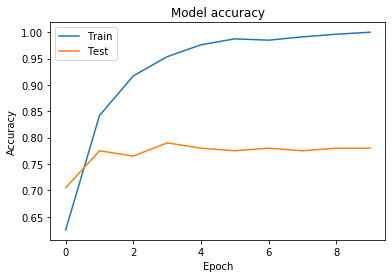

In [148]:
e=Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=False)

model=Sequential()
model.add(e)
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(train_sequence,y_train, validation_data=(test_sequence, y_test),epochs=10, batch_size=10,verbose=2)
seed(0)
tensorflow.random.set_seed(0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

***
**T2.4** Change the $trainable$ attribute to True and see if there is any difference in the performance.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 797 samples, validate on 200 samples
Epoch 1/10
 - 1s - loss: 0.6502 - accuracy: 0.6311 - val_loss: 0.5634 - val_accuracy: 0.7100
Epoch 2/10
 - 1s - loss: 0.3425 - accuracy: 0.8971 - val_loss: 0.4256 - val_accuracy: 0.8100
Epoch 3/10
 - 1s - loss: 0.1102 - accuracy: 0.9862 - val_loss: 0.3950 - val_accuracy: 0.8300
Epoch 4/10
 - 1s - loss: 0.0397 - accuracy: 0.9950 - val_loss: 0.3995 - val_accuracy: 0.8300
Epoch 5/10
 - 1s - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.4114 - val_accuracy: 0.8300
Epoch 6/10
 - 1s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.8500
Epoch 7/10
 - 1s - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.4181 - val_accuracy: 0.8400
Epoch 8/10
 - 1s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.4162 - val_accuracy: 0.8600
Epoch 9/10
 - 1s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.4358 - val_accuracy: 0.8450
Epoch 10/10
 - 1s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4361 - val_accuracy: 0.8600


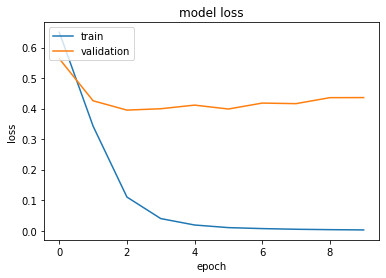

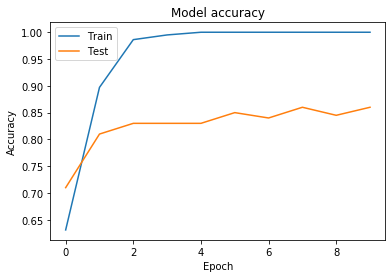

In [153]:
e=Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=True)

model=Sequential()
model.add(e)
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(train_sequence,y_train, validation_data=(test_sequence, y_test),epochs=10, batch_size=10,verbose=2)
seed(0)
tensorflow.random.set_seed(0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Task 3: Convolutional  Neural Network

**T3.1** Build a CNN using the embeding layer as previously. You can add filters using [Conv1D](https://keras.io/layers/convolutional/) layers and perform pooling via [max-pooling layer](https://keras.io/layers/pooling/). At the end you should add some Dense layers suitable for the classification task. Try using fixed pre-trained weights and trainable embeddings for comparison.

In [156]:
from keras.layers import Conv1D
from keras.layers import GlobalMaxPool1D

Train on 797 samples, validate on 200 samples
Epoch 1/10
 - 1s - loss: 0.6389 - accuracy: 0.6700 - val_loss: 0.5411 - val_accuracy: 0.7950
Epoch 2/10
 - 1s - loss: 0.4451 - accuracy: 0.8582 - val_loss: 0.4043 - val_accuracy: 0.8300
Epoch 3/10
 - 0s - loss: 0.2974 - accuracy: 0.9072 - val_loss: 0.3270 - val_accuracy: 0.8750
Epoch 4/10
 - 0s - loss: 0.1967 - accuracy: 0.9511 - val_loss: 0.3210 - val_accuracy: 0.8650
Epoch 5/10
 - 0s - loss: 0.1282 - accuracy: 0.9762 - val_loss: 0.3002 - val_accuracy: 0.8650
Epoch 6/10
 - 0s - loss: 0.0819 - accuracy: 0.9887 - val_loss: 0.2999 - val_accuracy: 0.8650
Epoch 7/10
 - 0s - loss: 0.0524 - accuracy: 0.9950 - val_loss: 0.3162 - val_accuracy: 0.8500
Epoch 8/10
 - 0s - loss: 0.0339 - accuracy: 0.9987 - val_loss: 0.3286 - val_accuracy: 0.8550
Epoch 9/10
 - 0s - loss: 0.0256 - accuracy: 0.9987 - val_loss: 0.3286 - val_accuracy: 0.8550
Epoch 10/10
 - 0s - loss: 0.0164 - accuracy: 0.9987 - val_loss: 0.3462 - val_accuracy: 0.8450


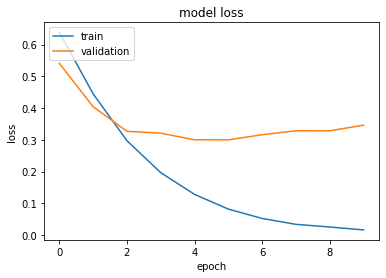

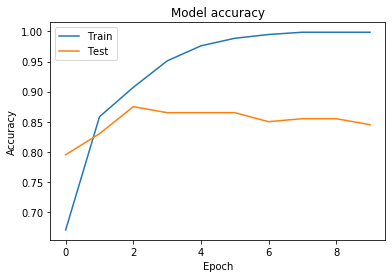

In [158]:
e=Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=False)

model=Sequential()
model.add(e)
model.add(Conv1D(filters=32,kernel_size=(3)))
model.add(GlobalMaxPool1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(train_sequence,y_train, validation_data=(test_sequence, y_test),epochs=10, batch_size=10,verbose=2)
seed(0)
tensorflow.random.set_seed(0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 797 samples, validate on 200 samples
Epoch 1/10
 - 1s - loss: 0.6282 - accuracy: 0.6575 - val_loss: 0.4782 - val_accuracy: 0.8250
Epoch 2/10
 - 1s - loss: 0.3340 - accuracy: 0.8908 - val_loss: 0.3362 - val_accuracy: 0.8700
Epoch 3/10
 - 2s - loss: 0.1363 - accuracy: 0.9787 - val_loss: 0.3113 - val_accuracy: 0.8800
Epoch 4/10
 - 1s - loss: 0.0488 - accuracy: 0.9937 - val_loss: 0.3170 - val_accuracy: 0.8550
Epoch 5/10
 - 1s - loss: 0.0179 - accuracy: 0.9987 - val_loss: 0.3254 - val_accuracy: 0.8600
Epoch 6/10
 - 1s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3318 - val_accuracy: 0.8600
Epoch 7/10
 - 1s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3456 - val_accuracy: 0.8600
Epoch 8/10
 - 1s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3516 - val_accuracy: 0.8700
Epoch 9/10
 - 1s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3627 - val_accuracy: 0.8700
Epoch 10/10
 - 1s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3674 - val_accuracy: 0.8750


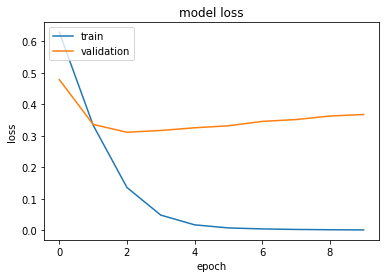

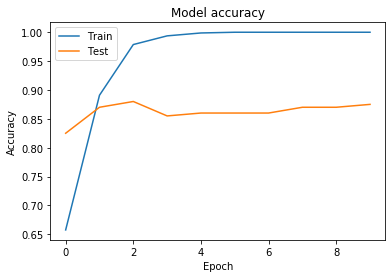

In [159]:
e=Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=True)

model=Sequential()
model.add(e)
model.add(Conv1D(filters=32,kernel_size=(3)))
model.add(GlobalMaxPool1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(train_sequence,y_train, validation_data=(test_sequence, y_test),epochs=10, batch_size=10,verbose=2)
seed(0)
tensorflow.random.set_seed(0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()